# Assignment 1

**Due to**: 11/01/2022 (dd/mm/yyyy)

If you deliver it by 11/12/2021 your assignment will be graded by 11/01/2022.


**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

Please, read ALL the following instructions :)

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES. [What is punctuation?]{https://en.wikipedia.org/wiki/English_punctuation}

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!
If you use random embeddings or placeholder embeddings (e.g., everything is 0) this is automatically solved.

If you want to use other techniques: when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general (brief!) description of the task you have addressed and how you have addressed it
* A brief analysis of the data (class distribution, lenght, etc)
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis


# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the correctness of approach/methodology
* 1 point for the handling of OOV terms
* 1 point for the correct implementation of models (they must run and do the right thing)
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

The evaluation will not be based on the performance of the models!

We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. 

# Deliver

* Two files: a pdf file for the report, and a python notebook
* Put the names of the member of the team at the beginning of both files
* What about additional files, for example models or weights? You can upload them in a private cloud and insert the link in the report.
* Please, submit a notebook with clear sections, text boxes, and comments and indications about what is going on in the code. When we do not understand what is going on we get annoyed, when we are annoyed we tend to be more severe in our evaluation.



# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1273064/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.
If we do not reply within 3-4 days, please send it again!

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# Additional notes and FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* For the baseline, it must have only two trainable layers: the BiLSTM and the Dense/FC one. The Dense layer is the "classification head" with softmax activation. You must not add an additional dense layer on top of the baseline. You can use the embedding layer before the BiLSTM, but it must be not trainable.
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.
* For the application of the Dense Layer, it is recommended to use a Time-Distributed Dense. In any case, doing otherwise is NOT considered an error.
* Some examples of things you can analyze in your discussion and error analysis are: the performances on the most frequent classes and the less frequent classes, precision and recall, the confusion tables, specific misclassified samples.
* Punctuation: you must keep the punctuation in the documents, since it may be helpful for the model, you simply must ignore it when you perform the evaluation of the model, not considering the punctuation classes among the ones you use to compute F1 macro score. If you are curious, you can run ADDITIONAL experiments where you remove punctuation to see its impact.

___
# ASSIGNMENT START 
___

In [1]:
# installing requirements
!pip install torch
!pip install --upgrade gensim
!pip install torchtext
!pip install "ray[tune]"
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58.9 MB 1.2 MB/s 
     |████████████████████████████████| 8.8 MB 21.8 MB/s 
     |████████████████████████████████| 125 kB 73.5 MB/s 
     |████████████████████████████████| 468 kB 70.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.

# Imports and Download of the dataset

In [2]:
# Libraries imports

# File management
import os, shutil  
import sys 

# Time
import time 

# Dataframe management
import pandas as pd  

# Data manipulation
import numpy as np  
import math
import random

# Download files
import urllib.request
# Unzip files
import tarfile

# NN managers
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import DataLoader
import torchmetrics

# Plotting
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker

# Embedding manager
import gensim
import gensim.downloader as gloader

# stats
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Fixing seeds for randomness to get deterministic results. (LSTM implementatation not guaranteed to be, see [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html))

In [4]:
SEED = 42
random.seed(SEED) # random
np.random.seed(SEED) # numpy
torch.manual_seed(SEED); # pytorch

Dataset download

In [5]:
# Folder used for the downloaded dataset
dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

# Check if folder exists, create otherwise
if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

# Dataset folder name, url and path of the downloaded zip
dataset_name = "dependency_treebank"
dataset_url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"
dataset_path = os.path.join(dataset_folder, "dataset.zip")

# Download the dataset only if not present
if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(dataset_url, dataset_path)
    print("Successful download")

# Unzip dataset
shutil.unpack_archive(filename=dataset_path, extract_dir=dataset_folder)
print("Successful extraction")

Successful download
Successful extraction


Quick data file inspection

In [6]:
# Check a file of the dataset
file_path = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, "wsj_0001.dp")

# If file exists, read it
if os.path.isfile(file_path):
    with open(file_path, mode='r', encoding='utf-8') as text_file:
        text = text_file.read()
        print(text)
        print(len(text))

Pierre	NNP	2
Vinken	NNP	8
,	,	2
61	CD	5
years	NNS	6
old	JJ	2
,	,	2
will	MD	0
join	VB	8
the	DT	11
board	NN	9
as	IN	9
a	DT	15
nonexecutive	JJ	15
director	NN	12
Nov.	NNP	9
29	CD	16
.	.	8

Mr.	NNP	2
Vinken	NNP	3
is	VBZ	0
chairman	NN	3
of	IN	4
Elsevier	NNP	7
N.V.	NNP	12
,	,	12
the	DT	12
Dutch	NNP	12
publishing	VBG	12
group	NN	5
.	.	3

331


# Dataframe Creation

In [7]:
# Temp dictionary that will contain each row the dataset
dataframe_rows = []
dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original", "dependency_treebank")

# Indexes for the dataset
ind = 1
sentence = 0

# For each file of our dataset iterate
for file in sorted(os.listdir(dataset_folder)):
    file_path = os.path.join(dataset_folder, file)

    # Try to open the file
    try:
        if os.path.isfile(file_path):
            with open(file_path, mode='r', encoding='utf-8') as text_file:

                # Read each line of the file
                line = text_file.readline()
                while line:

                    # If the line is empty, end of sentence
                    if not line.strip():
                        sentence += 1
                    # Split the tokens and fill the dictionary
                    else:
                        split_values = line.split()
                        token = split_values[0]
                        tag = split_values[1]
                        dataframe_row = {
                            "file_id": ind,
                            "sentence_id": sentence,
                            "token": token,
                            "tag": tag
                        }
                        dataframe_rows.append(dataframe_row)

                    line = text_file.readline()
    except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

    # End of file, increment document and sentence index 
    ind = ind+1
    sentence = sentence+1
    

# Create the dataframe
dataframe = pd.DataFrame(dataframe_rows)
print(dataframe)

       file_id  sentence_id    token  tag
0            1            0   Pierre  NNP
1            1            0   Vinken  NNP
2            1            0        ,    ,
3            1            0       61   CD
4            1            0    years  NNS
...        ...          ...      ...  ...
94079      199         3913  quarter   NN
94080      199         3913       of   IN
94081      199         3913     next   JJ
94082      199         3913     year   NN
94083      199         3913        .    .

[94084 rows x 4 columns]


# Tag handling

Mapping tags to indexes

In [8]:
# Get all the unique tags
n_classes = dataframe["tag"].unique().shape[0]

# Create two dictionaries of tags
# tags_dict -> {Tag: Id}
# tags_dict_reversed -> {Id: Tag}
tags_dict = {}
tags_dict_reversed = {}
for id in range(0, n_classes):
    tags_dict_reversed[id] = dataframe["tag"].unique()[id]
    tags_dict[dataframe["tag"].unique()[id]] = id

print(tags_dict)
print(tags_dict_reversed)

{'NNP': 0, ',': 1, 'CD': 2, 'NNS': 3, 'JJ': 4, 'MD': 5, 'VB': 6, 'DT': 7, 'NN': 8, 'IN': 9, '.': 10, 'VBZ': 11, 'VBG': 12, 'CC': 13, 'VBD': 14, 'VBN': 15, 'RB': 16, 'TO': 17, 'PRP': 18, 'RBR': 19, 'WDT': 20, 'VBP': 21, 'RP': 22, 'PRP$': 23, 'JJS': 24, 'POS': 25, '``': 26, 'EX': 27, "''": 28, 'WP': 29, ':': 30, 'JJR': 31, 'WRB': 32, '$': 33, 'NNPS': 34, 'WP$': 35, '-LRB-': 36, '-RRB-': 37, 'PDT': 38, 'RBS': 39, 'FW': 40, 'UH': 41, 'SYM': 42, 'LS': 43, '#': 44}
{0: 'NNP', 1: ',', 2: 'CD', 3: 'NNS', 4: 'JJ', 5: 'MD', 6: 'VB', 7: 'DT', 8: 'NN', 9: 'IN', 10: '.', 11: 'VBZ', 12: 'VBG', 13: 'CC', 14: 'VBD', 15: 'VBN', 16: 'RB', 17: 'TO', 18: 'PRP', 19: 'RBR', 20: 'WDT', 21: 'VBP', 22: 'RP', 23: 'PRP$', 24: 'JJS', 25: 'POS', 26: '``', 27: 'EX', 28: "''", 29: 'WP', 30: ':', 31: 'JJR', 32: 'WRB', 33: '$', 34: 'NNPS', 35: 'WP$', 36: '-LRB-', 37: '-RRB-', 38: 'PDT', 39: 'RBS', 40: 'FW', 41: 'UH', 42: 'SYM', 43: 'LS', 44: '#'}


Setup for ignoring punctuation/symbols

In [10]:
# Return the indexes of all specified tags
def get_indeces(tags_dict: dict, ignore_list: list) -> list:
    idxs = [tags_dict[key] for key in ignore_list]
    return idxs

In [11]:
# POS has tokens ' and 's, which contain punctuation (apostrophe), but we don't remove this tag from evaluation. we consider it normal words.
# $, &, # are symbols 
ignore_list = [',','.','``',"''", ':', '-LRB-','-RRB-', 'SYM', '#', '$']
ignore_idx = get_indeces(tags_dict, ignore_list)
print(f"classes ignored in evaluation: {ignore_list}, idx: {ignore_idx}")
target_names = list(tags_dict.keys())
for tag in ignore_list:
  target_names.remove(tag)
target_idx = get_indeces(tags_dict, target_names)
print(f"classes evaluated: {target_names}, idx: {target_idx}")

classes ignored in evaluation: [',', '.', '``', "''", ':', '-LRB-', '-RRB-', 'SYM', '#', '$'], idx: [1, 10, 26, 28, 30, 36, 37, 42, 44, 33]
classes evaluated: ['NNP', 'CD', 'NNS', 'JJ', 'MD', 'VB', 'DT', 'NN', 'IN', 'VBZ', 'VBG', 'CC', 'VBD', 'VBN', 'RB', 'TO', 'PRP', 'RBR', 'WDT', 'VBP', 'RP', 'PRP$', 'JJS', 'POS', 'EX', 'WP', 'JJR', 'WRB', 'NNPS', 'WP$', 'PDT', 'RBS', 'FW', 'UH', 'LS'], idx: [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 34, 35, 38, 39, 40, 41, 43]


In [12]:
# adds the tag_idx column to the dataframe
dataframe["tag_idx"] = dataframe['tag'].map(lambda x: tags_dict[x])
print(dataframe.head())

   file_id  sentence_id   token  tag  tag_idx
0        1            0  Pierre  NNP        0
1        1            0  Vinken  NNP        0
2        1            0       ,    ,        1
3        1            0      61   CD        2
4        1            0   years  NNS        3


A look at tag distribution in the dataset

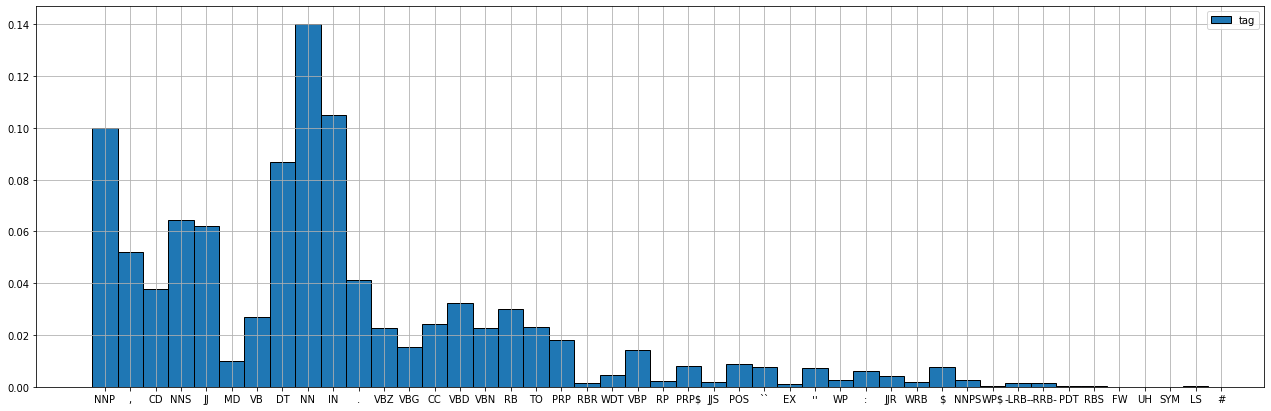

In [13]:
bins = list(tags_dict.keys())
his = dataframe["tag"].hist(figsize=(22,7), align="left", ec='black', legend=True, bins=bins, density=True)
plt.show()

# Preprocessing

Since the GloVe dictionary is uncased, we decided to perform a simple operation of preprocessing converting to lowercase our training set.

In [14]:
# lowercase tokens in the dataset
dataframe['token'] = dataframe['token'].map(str.lower)

# Split the dataset in train, validation and test 

In [15]:
# Train set
train = dataframe[dataframe["file_id"] <= 100].copy()
print(train)

       file_id  sentence_id      token  tag  tag_idx
0            1            0     pierre  NNP        0
1            1            0     vinken  NNP        0
2            1            0          ,    ,        1
3            1            0         61   CD        2
4            1            0      years  NNS        3
...        ...          ...        ...  ...      ...
47351      100         1962  challenge   NN        8
47352      100         1962         he  PRP       18
47353      100         1962        has  VBZ       11
47354      100         1962      faced  VBN       15
47355      100         1962          .    .       10

[47356 rows x 5 columns]


In [16]:
# Validation set
val = dataframe[dataframe["file_id"].between(101,150)].copy()
print(val)

       file_id  sentence_id         token  tag  tag_idx
47356      101         1963             a   DT        7
47357      101         1963  house-senate  NNP        0
47358      101         1963    conference   NN        8
47359      101         1963      approved  VBD       14
47360      101         1963         major   JJ        4
...        ...          ...           ...  ...      ...
78534      150         3261         terms  NNS        3
78535      150         3261          were  VBD       14
78536      150         3261           n't   RB       16
78537      150         3261     disclosed  VBN       15
78538      150         3261             .    .       10

[31183 rows x 5 columns]


In [17]:
# Test set
test = dataframe[dataframe["file_id"] > 150].copy()
print(test)

       file_id  sentence_id      token  tag  tag_idx
78539      151         3262  intelogic  NNP        0
78540      151         3262      trace  NNP        0
78541      151         3262       inc.  NNP        0
78542      151         3262          ,    ,        1
78543      151         3262        san  NNP        0
...        ...          ...        ...  ...      ...
94079      199         3913    quarter   NN        8
94080      199         3913         of   IN        9
94081      199         3913       next   JJ        4
94082      199         3913       year   NN        8
94083      199         3913          .    .       10

[15545 rows x 5 columns]


Quick glance at the normalized distribution of tags in the 3 sets

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


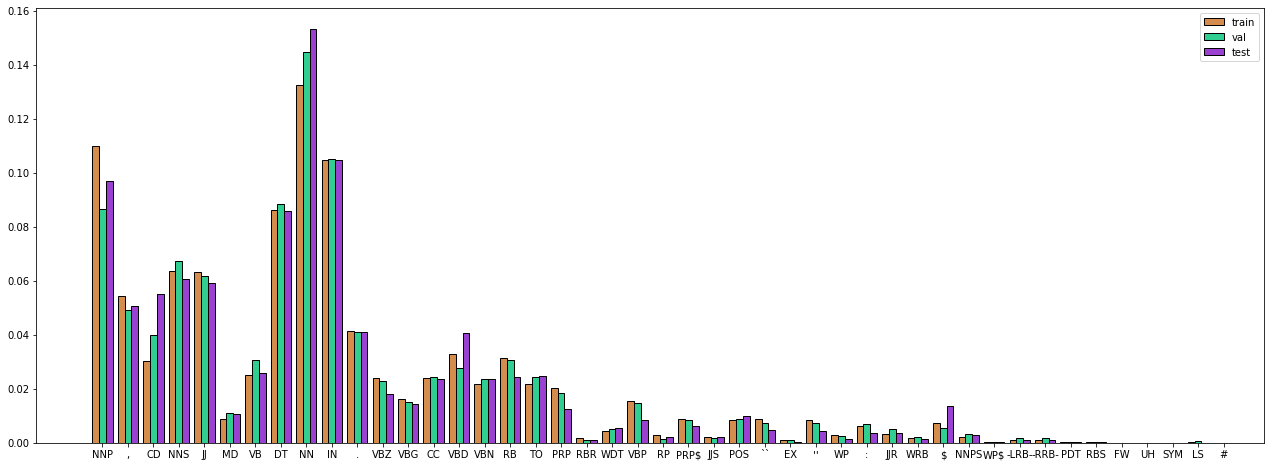

In [18]:
bins = list(tags_dict.keys())
train_hist = train["tag"]
val_hist = val["tag"]
test_hist = test["tag"]
plt.figure(figsize = (22,8))
plt.hist([train_hist, val_hist, test_hist], bins, ec='black', label=["train", "val", "test"], 
         align = "left", density = True, color=["#D48D4D", "#31CE92", "#9A41D1"])
plt.legend()
plt.show()

# GloVe embeddings


In [19]:
# Define wanted embedding dimension
embedding_dimension = 100

# Download and load wikipedia GloVe embeddings
download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
emb_model = gloader.load(download_path)

# print some of the word tokens
print(emb_model.index_to_key[1:30])

[==================================================] 100.0% 128.1/128.1MB downloaded
[',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an']


# Create our vocabulary

Even though we could have worked on the whole dataset for getting the OOV and then split in Train, Test and Val, we decided to follow the rigorous procedure for handling oov in the splits. This is because in the future we may want to try something different with OOV embeddings.

In [20]:
!pip install ordered-set

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from ordered_set import OrderedSet # to make our vocabulary indeces always the same (reproducibility)

def check_OOV_terms(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                    dataframe: pd.DataFrame):
    """
    Checks differences between pre-trained embedding model vocabulary
    and dataset specific vocabulary in order to highlight out-of-vocabulary terms.

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_listing: dataset specific vocabulary (list)

    :return
        - list of OOV terms
    """

    # Set of all the terms in the GloVe embedding
    embedding_vocabulary = OrderedSet(embedding_model.index_to_key)

    # OOV = gloveTerms - ourDataframeTerms 
    oov = OrderedSet(dataframe["token"]).difference(embedding_vocabulary)
    return list(oov)

In [22]:
# Number of terms in the original vocabulary
v1_last_index = len(emb_model.index_to_key)-1  # index where V1 ends
print("Pre oov-adding vocabulary dimension:", v1_last_index+1)

Pre oov-adding vocabulary dimension: 400000


In [23]:
# Get the OOV
oov1 = check_OOV_terms(embedding_model=emb_model, dataframe=train)
oov2 = check_OOV_terms(embedding_model=emb_model, dataframe=val)
oov3 = check_OOV_terms(embedding_model=emb_model, dataframe=test)

print("oov words in trainset:", len(oov1))
print("oov words in valset:", len(oov2))
print("oov words in testset:", len(oov3))
print("total:", len(oov1)+len(oov2)+len(oov3))

oov words in trainset: 359
oov words in valset: 213
oov words in testset: 161
total: 733


Adding the OOV terms to the glove vocabulary with an embedding vector of 0s or of random normal values. (from the same distribution of the ones present in the vocabulary)

In [24]:
# bools for the embedding criteria
use_zero_vectors = False # in this run we use random vectors
use_random_vectors = ~use_zero_vectors
if use_zero_vectors:
  print('Using 0s as embedding vectors')
  generate_emb_vector = lambda: np.zeros(embedding_dimension)
elif use_random_vectors:
  glove_emb_std = np.std(emb_model.vectors[:v1_last_index])
  glove_emb_mean = np.mean(emb_model.vectors[:v1_last_index])
  print(f'Using randomly generated embedding vectors from gaussian distribution (mean: {glove_emb_mean:.3f}, std. dev: {glove_emb_std:.3f})')
  generate_emb_vector = lambda: np.random.normal(size=embedding_dimension, loc=glove_emb_mean, scale=glove_emb_std)

# idx of <PAD>
PAD_INDEX = v1_last_index + 1
# embedding value of <PAD>
pad_vector = generate_emb_vector()
# adding the pad, train, val, test oov words in sequence
emb_model.add_vectors(['<PAD>'] + oov1, [pad_vector] + [generate_emb_vector() for _ in range(0, len(oov1))])

v2_last_index = len(emb_model.index_to_key)
emb_model.add_vectors(oov2, [generate_emb_vector() for _ in range(0, len(oov2))])

v3_last_index = len(emb_model.index_to_key)
emb_model.add_vectors(oov3, [generate_emb_vector() for _ in range(0, len(oov3))])

v4_last_index = len(emb_model.index_to_key)

print(f'The vocabulary now contains {len(emb_model)} tokens.') 
# note that when duplicate oov words from one dataset are added to the KeyedVector the value is not updated. this is fine.

Using randomly generated embedding vectors from gaussian distribution (mean: 0.004, std. dev: 0.408)
The vocabulary now contains 400677 tokens.


# Map tokens to integers

All the terms in our dataframe will now be remapped to the corresponding glove embedding index in order to be later used as input to our models.

In [25]:
# Create the token_idx column in our dataframe
train["token_idx"] = train["token"].map(lambda x : emb_model.key_to_index[x])
val["token_idx"] = val["token"].map(lambda x : emb_model.key_to_index[x]) 
test["token_idx"] = test["token"].map(lambda x : emb_model.key_to_index[x])

# Definition of the Models

**Baseline**: Simple two layers architecture.

- Bidirectional LSTM layer 
- Dense/Fully-Connected layer

**GRU**: Simple GRU architecture.

- Bidirectional GRU layer 
- Dense/Fully-Connected layer


**Double LSTM**: Extend Baseline Model with another LSTM layer.

- Bidirectional LSTM layer 
- Bidirectional LSTM layer 
- Dense/Fully-Connected layer


**Double Dense layers**: Extend Baseline Model with another Dense layer.

- Bidirectional LSTM layer 
- Dense/Fully-Connected layer
- Dense/Fully-Connected layer

$\alpha$ parameter setup. See the report for more details (or [stackexchange post](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw/136542#136542))

In [26]:
def adapt_power_of_two(n):
    """Returns the closest power of 2 to the given input value."""
    if n<0:
      raise ValueError('This parameter must be positive')
        
    maximum = np.ceil(math.log(n,2))
    max_pow_of_two = 2**maximum
    minimum = np.floor(math.log(n,2)) 
    min_pow_of_two = 2**minimum
 
    if (max_pow_of_two - n) <= (n - min_pow_of_two ):
        return int(max_pow_of_two)
    else:
        return int(min_pow_of_two)
    

Function which computes the number of hidden layers.

In [27]:
# Number of hidden layers
def compute_n_hidden_layers(n_samples, n_input, n_output, alpha):
    n_hidden_layers = n_samples // (alpha * (n_input+n_output))
    return n_hidden_layers

## Base Bidirectional LSTM Model


In [28]:
class BiLSTM_Model(nn.Module):
    def __init__(self, 
                 emb_model, 
                 input_dim,
                 embedding_dim, 
                 hidden_dim, 
                 output_dim, 
                 n_layers_lstm,
                 bidirectional,
                 padding_index):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = padding_index).requires_grad_(False)
        
        self.embedding.weights = nn.Parameter(torch.from_numpy(emb_model.vectors))
        
        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_dim // 2, 
                            num_layers = n_layers_lstm, 
                            bidirectional = bidirectional,
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_dim) 

        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, text):
        
        embedded = self.embedding(text)
        
        outputs, (hidden, cell) = self.lstm(embedded)

        outputs = self.fc(outputs)

        predictions = outputs
                
        return predictions

## Bidirectional LSTM Model with two FC layers


In [29]:
class BiLSTM_Model_multiple_fc(nn.Module):
    def __init__(self, 
                 emb_model, 
                 input_dim,
                 embedding_dim, 
                 hidden_dim1,
                 hidden_dim2,
                 output_dim, 
                 n_layers_lstm,
                 bidirectional,
                 padding_index):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = padding_index).requires_grad_(False)
        
        self.embedding.weights = nn.Parameter(torch.from_numpy(emb_model.vectors))
        
        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_dim1 // 2, 
                            num_layers = n_layers_lstm, 
                            bidirectional = bidirectional,
                            batch_first=True)
        
        self.fc1 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc2 = nn.Linear(hidden_dim2, output_dim)
        
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, text):
        embedded = self.embedding(text)
        outputs, (hidden, cell) = self.lstm(embedded)
        outputs = self.fc1(outputs)
        outputs = self.relu(outputs)
        outputs = self.fc2(outputs)
        predictions = outputs
                
        return predictions

## Bidirectional GRU Model


In [30]:
class GRU_Model(nn.Module):
    def __init__(self, 
                 emb_model, 
                 input_dim,
                 embedding_dim, 
                 hidden_dim, 
                 output_dim, 
                 n_layers,
                 bidirectional,
                 padding_index):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = padding_index).requires_grad_(False)
        
        self.embedding.weights = nn.Parameter(torch.from_numpy(emb_model.vectors))
        
        self.gru = nn.GRU(embedding_dim, 
                            hidden_dim // 2, 
                            num_layers = n_layers, 
                            bidirectional = bidirectional,
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_dim) 
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, text):
        
        embedded = self.embedding(text)
        
        outputs, (hidden) = self.gru(embedded)
        
        outputs = self.fc(outputs)

        predictions = outputs      
        return predictions

# Training and Evaluation definitions

In [31]:
# Loss function
criterion = nn.CrossEntropyLoss(ignore_index = PAD_INDEX)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Validation metric

In [32]:
def categorical_accuracy(preds, y, tag_pad_idx):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    non_pad_elements = (y != tag_pad_idx).nonzero()
    correct = max_preds[non_pad_elements].squeeze(1).eq(y[non_pad_elements])
    return correct.sum() / y[non_pad_elements].shape[0]

Simple training loop

In [33]:
def train_model(model, iterator, optimizer, criterion, tag_pad_idx):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        text = batch[0]
        tags = batch[1]
  
        optimizer.zero_grad()
                
        predictions = model(text)
        
        predictions = predictions.view(-1, predictions.shape[-1])
        tags = tags.view(-1)
        
        loss = criterion(predictions, tags)
                
        acc = categorical_accuracy(predictions, tags, tag_pad_idx)
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Evaluation loop

In [34]:
def eval_model(model, iterator, criterion, tag_pad_idx):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:
            text = batch[0]
            tags = batch[1]
            
            predictions = model(text)
            
            predictions = predictions.view(-1, predictions.shape[-1])
            tags = tags.view(-1)
            
            loss = criterion(predictions, tags)
            
            acc = categorical_accuracy(predictions, tags, tag_pad_idx)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Early stopper for our training

In [ ]:
# from https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        # If the val loss is less than our previous "best" loss, let the model improve
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        # If the val loss is higher than our previous "best" loss, increase patience
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1

            # If max patience is reached, stop training
            if self.counter >= self.patience:
                return True
        return False

Function to get predictions from any model, on any dataset

In [35]:
def get_ys(model, iterator, tag_pad_idx, ignore_idx=[], target_names=target_names, target_idx=target_idx):
    """Computes predictions for the sequences given, returns the filtered predictions and targets, removing padding and ignored indexes (e.g. punctuation)."""
    model.eval()
    with torch.no_grad():
        # to have all predictions at once
      epoch_predictions = torch.Tensor().to(device)
      epoch_tags = torch.LongTensor().to(device)
      for batch in iterator:
        text = batch[0]
        tags = batch[1]
        
        predictions = model(text)
        # concatenate values
        epoch_predictions = torch.cat([epoch_predictions, predictions.view(-1, predictions.shape[-1])],dim=0)
        epoch_tags = torch.cat([epoch_tags, tags.view(-1)],dim=0)
    # indeces of punctuation and padding (ignored)
    pads_or_punct = torch.IntTensor([tag_pad_idx]+ignore_idx).to(device)
    # mask to filter tags
    non_pad_or_punct_elements = torch.isin(elements=epoch_tags,test_elements=pads_or_punct,invert=True)
    # argmax to get the model's most confident tag
    epoch_predictions = torch.argmax(epoch_predictions, dim=1)

    # apply mask to remove punctuation
    filtered_predictions = epoch_predictions[non_pad_or_punct_elements]
    filtered_tags = epoch_tags[non_pad_or_punct_elements]
    
    filtered_predictions = filtered_predictions.cpu()
    filtered_tags = filtered_tags.cpu()

    return filtered_predictions, filtered_tags

## Definitions for the analysis of results 

In [36]:
def get_classification_report(y_pred, y_true, target_names=target_names, target_idx=target_idx):
    """Given the predictions and targets, returns the sklearn classification report.
    target_names: the class names to display.
    target_idx: the class indeces."""

    report = classification_report(y_true=y_true, y_pred=y_pred, target_names=target_names, labels=target_idx, zero_division=0)
    return report

In [37]:
def plot_confusion_matrix(y_pred, y_true, target_names=target_names, target_idx=target_idx, normalize='true', title=None):
    """Given the predictions and targets, plots the confusion matrix using sklearn.
    target_names: the class names to display.
    target_idx: the class indeces.
    normalize: 'true', 'pred', 'all' or None. Whether to normalize values by true class, by predictions, by total samples, or not normalize at all.  """
    
    f = plt.figure(figsize=(10,10))
    ax = f.add_subplot(111)
    ax.set_title(title)
    ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, normalize=normalize, labels = target_idx, display_labels=target_names, 
                                            ax=ax, include_values=False, xticks_rotation='vertical')
    plt.plot()

## Definitions for dataloader and padding

In [38]:
# wrapper class for dataframe. give it to the dataloader
from torch.utils.data import Dataset

class PandasDataset(Dataset):
    def __init__(self, dataframe):

        self.dataframe = dataframe

        # Get the list of the sentence_id
        sentence_values = pd.DataFrame(pd.unique(dataframe["sentence_id"]))[0]

        # Create the serie of all the sentences
        sentence = sentence_values.map(lambda n : self.__make_sentence__(dataframe, n, 'token_idx')).to_frame()

        # Also add the same sentence but formed with the tags of each word
        sentence_tags = sentence_values.map(lambda n : self.__make_sentence__(dataframe, n, 'tag_idx')).to_frame()
        sentence['tags'] = sentence_tags[0]
        sentence = sentence.rename(columns={0: 'tokens'})
        self.sentence = sentence
        
    def __make_sentence__(self, dataframe, n, column):
        """Given the dataframe and the index of the sentence, create an array composed
         by the sequence of indexes of terms of that specific sentence
         :param dataframe: pandas dataframe
         :param n: index of the sentence
         :return - array of the sentence formed by the term indexes"""
        l = dataframe.index[dataframe['sentence_id'] == n]
        return np.array(dataframe.loc[l, column])

    def __len__(self):
        return len(self.sentence)

    def __getitem__(self, index): 
        return torch.tensor(self.sentence['tokens'][index]), torch.tensor((self.sentence['tags'][index]))

Function used to insert padding to batches in order to have all the batches of the same size

In [39]:
def pad_batch(batch, emb_model):
    tokens, tags = zip(*batch)

    # Get the length of the "longest" sentence in our batch
    collapse_left_pad = max(len(elem) for elem in tokens) 
    temp_tensor_length = 0
    
    batch_tokens = []
    batch_tags = []

    for tensor in range(len(tokens)):
        # Get how much padding the current sentence needs
        temp_tensor_length = collapse_left_pad - len(tokens[tensor])

        # Pad both the word sentence and the tag sentence
        token_pad = torch.nn.functional.pad(tokens[tensor], pad =(0, temp_tensor_length), mode='constant', value=emb_model.key_to_index['<PAD>'])
        tag_pad = torch.nn.functional.pad(tags[tensor], pad=(0, temp_tensor_length) , mode='constant', value=emb_model.key_to_index['<PAD>'])
        
        batch_tokens.append(token_pad)
        batch_tags.append(tag_pad)

    # Correctly recreate the batch
    token_tensor = torch.stack(batch_tokens)
    tag_tensor = torch.stack(batch_tags)
    
    return token_tensor, tag_tensor

# Plotting Definitions

In [42]:
def plot_measure(model_dicts, measure):
    """This function plots measure values from the models dictionary data structure. Measure is taken as a string. """
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.xlabel('Epoch')
    plt.ylabel(measure)
    ax = plt.subplot(111)

    for model_dict in iter(model_dicts.values()):
        plt.plot(model_dict["best_dataframe"][measure], label=model_dict["name"])
        
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Hyper-parameter tuning

In [44]:
from ray import tune
from ray.tune import CLIReporter, JupyterNotebookReporter
import ray
from ray.air import session

Definition of directories for saving weights and training history

In [45]:
best_weights_dir = "./best_weights"
best_dataframes_dir = "./best_dataframes"
if not os.path.isdir(best_weights_dir):  
    # if the best weights directory is 
    # not present then create it.
    os.makedirs(best_weights_dir)
if not os.path.isdir(best_dataframes_dir):  
    os.makedirs(best_dataframes_dir)

Definition of the Model Factory class

In [46]:
class Model_factory():
  """This class intantiates any of the four models with the right parameters, also given the ray tune config dictionary."""
  def __init__(self, emb_model, num_classes):
    self.emb_model = emb_model
    self.INPUT_DIM = len(self.emb_model) # Input dimension = length of our dictionary
    self.OUTPUT_DIM = num_classes
    self.EMBEDDING_DIM = self.emb_model[0].shape[0]
    self.PADDING_IDX = self.emb_model.key_to_index["<PAD>"]
    self.HIDDEN_DIM = None # will be specified at runtime

    self.constructor_dict = {"baseline": BiLSTM_Model,
                             "gru": GRU_Model,
                             "additional_biLSTM_layer": BiLSTM_Model,
                             "additional_fully_connected_layer": BiLSTM_Model_multiple_fc}

    self.args_dict = {"emb_model" : self.emb_model,
                            "input_dim" : self.INPUT_DIM,
                            "embedding_dim" : self.EMBEDDING_DIM, 
                            "hidden_dim" : self.HIDDEN_DIM, 
                            "output_dim" : self.OUTPUT_DIM,
                            "n_layers_lstm" : 1,
                            "bidirectional" : True, 
                            "padding_index" : self.PADDING_IDX}

  def get_model(self, model_name: str, config: dict):
    model_args = self.args_dict.copy()
    hidden_dim = adapt_power_of_two(compute_n_hidden_layers(train.shape[0], self.EMBEDDING_DIM, self.OUTPUT_DIM, config["alpha"]))

    # change parameter dictionary based on model architecture
    if model_name == "baseline":
      model_args["hidden_dim"] = hidden_dim
    elif model_name == "gru":
      model_args["hidden_dim"] = hidden_dim
      model_args.pop("n_layers_lstm", None)
      model_args["n_layers"] = 1
    elif model_name == "additional_biLSTM_layer":
      model_args["hidden_dim"] = hidden_dim
      model_args["n_layers_lstm"] = 2
    elif model_name == "additional_fully_connected_layer":
      model_args["hidden_dim1"] = hidden_dim
      model_args["hidden_dim2"] = hidden_dim
      model_args.pop("hidden_dim", None)
      
    # builds the model using its constructor and arguments
    return self.constructor_dict[model_name](**model_args)

Definition of the main training/validation loop with the Ray Tune API specifications

In [47]:
# hyperparameter tuning on the four models
def train_and_eval_model_with_raytune(config, model_factory: Model_factory, model_name: str, n_epochs: int, torch_train, torch_val, criterion, tag_pad_idx, emb_model, verbose=0,
                                      checkpoint_dir=None): 

    # Create model
    model = model_factory.get_model(model_name, config)
    # add it to device
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=config["lr"])
    # load from checkpoint dir
    if checkpoint_dir:
        print("LOADING FROM", checkpoint_dir)
        model_state, optimizer_state = torch.load(os.path.join(checkpoint_dir, "checkpoint"))
        model.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Correctly initialize our data for training and validation
    train_dataloader = DataLoader(torch_train, batch_size=config['batch_size'],shuffle=False, collate_fn=lambda x: tuple(x_.to(device) for x_ in pad_batch(x,emb_model)))
    val_dataloader = DataLoader(torch_val, batch_size=config['batch_size'], shuffle=False, collate_fn=lambda x: tuple(x_.to(device) for x_ in pad_batch(x,emb_model)))

    # Define early stopper
    early_stopper = EarlyStopper(patience=3, min_delta=config["min_delta"])

    # Train for n_epochs
    for epoch in range(n_epochs):
      
        # Perform training
        train_loss, train_acc = train_model(model=model, iterator=train_dataloader, optimizer=optimizer, criterion=criterion, tag_pad_idx=tag_pad_idx)

        # Perform validation
        val_loss, val_acc = eval_model(model, val_dataloader, criterion, tag_pad_idx=PAD_INDEX)

        if verbose == 1:
          print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
          print(f'\t Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')
          print("\n")

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((model.state_dict(), optimizer.state_dict()), path)

        # Log loss and accuracy
        tune.report(val_loss=val_loss, val_accuracy=val_acc, train_loss=train_loss, train_accuracy=train_acc)    

        if early_stopper.early_stop(val_loss):  
            print("Early stop")           
            break
    
    print("Finished Training")

Definition of the four models dictionary

In [48]:
dict_baseline = {"name": "baseline"}

dict_gru = {"name": "gru"}

dict_additional_bilstm = {"name": "additional_biLSTM_layer"}

dict_additional_fc = {"name": "additional_fully_connected_layer"}

model_dicts = {"baseline" : dict_baseline, 
               "gru": dict_gru,
               "additional_biLSTM_layer": dict_additional_bilstm,
               "additional_fully_connected_layer": dict_additional_fc}

In [49]:
factory = Model_factory(emb_model, n_classes)

In [50]:
# silence warnings
ray.init(log_to_driver=False)

2022-12-11 14:42:42,322	INFO worker.py:1528 -- Started a local Ray instance.


Python version:,3.8.16
Ray version:,2.1.0


Run with hyper-parameter tuning

In [51]:
# Number of epochs
N_EPOCHS = 15

# hyperparameters definition
config = {
    "alpha": tune.grid_search([1, 2, 10]),
    "batch_size" : tune.grid_search([1, 16, 128]),
    "lr": tune.grid_search([1e-3, 3e-3]), #1e-2 too bad
    "min_delta": -5e-3
}

reporter = JupyterNotebookReporter(metric_columns=["val_loss", "val_accuracy", "train_loss", "train_accuracy"], metric="val_accuracy", mode="max",sort_by_metric=True, print_intermediate_tables=False)

# tuning on each of the four models
for model_dict in iter(model_dicts.values()):
    
  torch_train = PandasDataset(train)
  torch_val = PandasDataset(val)

  result = tune.run(
          tune.with_parameters(train_and_eval_model_with_raytune, model_name=model_dict["name"], torch_train=torch_train, torch_val=torch_val, emb_model=emb_model, model_factory=factory, n_epochs=N_EPOCHS, 
                               criterion=criterion, tag_pad_idx=PAD_INDEX),
          resources_per_trial={"gpu" if str(device) == "cuda" else "cpu": 1},
          config=config,
          num_samples=1, # If grid_search is provided as an argument, the grid will be repeated num_samples of times
          progress_reporter=reporter,
          verbose=1,
          name=model_dict["name"],
          checkpoint_score_attr="val_accuracy",
          keep_checkpoints_num=1) # we'll keep the best X checkpoints at all times

  # get best result and save to model dictionary
  best_trial = result.get_best_trial(metric="val_accuracy", mode="max", scope='all')
  print("\nModel: {}".format(model_dict["name"]))
  print("Best trial config: {}".format(best_trial.config))
  print("Best trial final validation loss: {}".format(best_trial.last_result["val_loss"]))
  print("Best trial final validation accuracy: {}\n".format(best_trial.last_result["val_accuracy"]))

  model_dict["best_config"] = best_trial.config
  model_dict["best_loss"] = best_trial.last_result["val_loss"]
  model_dict["best_accuracy"] = best_trial.last_result["val_accuracy"]

  best_trained_model = factory.get_model(model_dict["name"], best_trial.config)
  best_trained_model.to(device)

  best_checkpoint_dir = best_trial.checkpoint.dir_or_data
  model_state, optimizer_state = torch.load(os.path.join(best_checkpoint_dir, "checkpoint"))
  best_trained_model.load_state_dict(model_state)
  model_dict["best_trained_model"] = best_trained_model

  best_trial_key = result.get_best_logdir(metric="val_accuracy", mode="max")
  model_dict["best_dataframe"] = result.trial_dataframes[best_trial_key]

/usr/local/lib/python3.8/dist-packages/ray/tune/trainable/function_trainable.py:609: DeprecationWarning: `checkpoint_dir` in `func(config, checkpoint_dir)` is being deprecated. To save and load checkpoint in trainable functions, please use the `ray.air.session` API:

from ray.air import session

def train(config):
    # ...
    session.report({"metric": metric}, checkpoint=checkpoint)

For more information please see https://docs.ray.io/en/master/tune/api_docs/trainable.html

  warnings.warn(
2022-12-11 14:56:01,834	INFO tune.py:777 -- Total run time: 786.82 seconds (786.48 seconds for the tuning loop).



Model: baseline
Best trial config: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}
Best trial final validation loss: 0.6508886274404642
Best trial final validation accuracy: 0.8233991832267947



2022-12-11 15:09:05,751	INFO tune.py:777 -- Total run time: 776.06 seconds (775.64 seconds for the tuning loop).



Model: gru
Best trial config: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}
Best trial final validation loss: 0.7136004552608584
Best trial final validation accuracy: 0.816640795004077



2022-12-11 15:22:42,818	INFO tune.py:777 -- Total run time: 812.12 seconds (811.69 seconds for the tuning loop).



Model: additional_biLSTM_layer
Best trial config: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}
Best trial final validation loss: 0.732228283838528
Best trial final validation accuracy: 0.83358824834591



2022-12-11 15:34:20,443	INFO tune.py:777 -- Total run time: 692.48 seconds (692.27 seconds for the tuning loop).



Model: additional_fully_connected_layer
Best trial config: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}
Best trial final validation loss: 0.8310432543114918
Best trial final validation accuracy: 0.8314518892183537



Saving dataframes and model weights

In [52]:
# save dataframe training history for each best model
print(f'Saving dataframes to .csv in {os.path.abspath(best_dataframes_dir)}')
print(f'Saving models in {os.path.abspath(best_weights_dir)}')
for model_dict in iter(model_dicts.values()):
  # save training history to file
  path = os.path.join(best_dataframes_dir, model_dict["name"]+".csv")
  model_dict["best_dataframe"].to_csv(path_or_buf=path)
  # save weights to file
  path = os.path.join(best_weights_dir, model_dict["name"])
  torch.save(best_trained_model, path)
print('Done')

Saving dataframes to .csv in /content/best_dataframes
Saving models in /content/best_weights
Done


In [53]:
# clean ray tune folders
! rm -r /root/ray_results
ray.shutdown()

# Testing and analysis

Optional loading from directories

In [54]:
load_from_dir = False # true if training was done previously
if load_from_dir:
  for model_dict in iter(model_dicts.values()):
    path = os.path.join(best_weights_dir, model_dict["name"])
    model_dict["best_trained_model"] = torch.load(path)

In [55]:
load_from_dir = False # true if training was done previously
if load_from_dir:
  for model_dict in iter(model_dicts.values()):
    path = os.path.join(best_dataframes_dir, model_dict["name"])
    model_dict["best_dataframe"] = pd.read_csv(filepath_or_buffer=path, index_col=0)

Plotting validation loss and accuracy for all best models

<ipython-input-42-5d6145734f1e>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


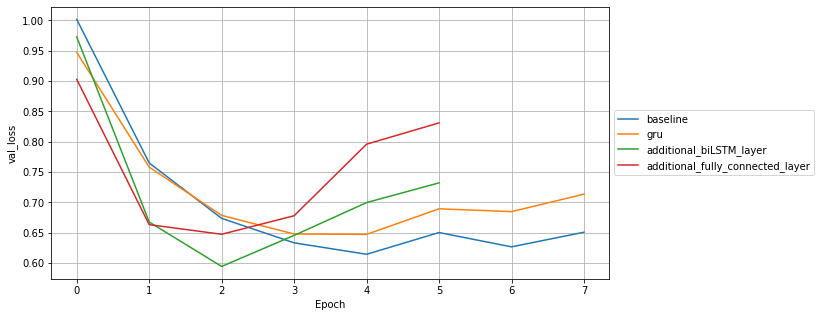

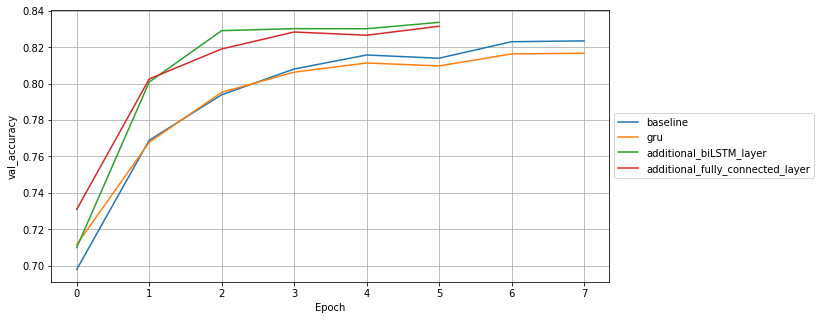

In [56]:
plot_measure(model_dicts, measure="val_loss")
plot_measure(model_dicts, measure="val_accuracy")

Select the best two models for testing

In [57]:
ranked_models = sorted(iter(model_dicts.values()), key=lambda x: x['best_accuracy'], reverse=True)

In [58]:
for model_dict, i in zip(ranked_models, range(1,len(ranked_models)+1)):
  print(f"{i}. {model_dict['name']}, val_acc: {model_dict['best_accuracy']:.3f}")
  print(f"\tbest hyper-pars: {model_dict['best_config']}")

1. additional_biLSTM_layer, val_acc: 0.834
	best hyper-pars: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}
2. additional_fully_connected_layer, val_acc: 0.831
	best hyper-pars: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}
3. baseline, val_acc: 0.823
	best hyper-pars: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}
4. gru, val_acc: 0.817
	best hyper-pars: {'alpha': 1, 'batch_size': 16, 'lr': 0.003, 'min_delta': -0.005}


Visualize confusion matrix on the test set for the two best models

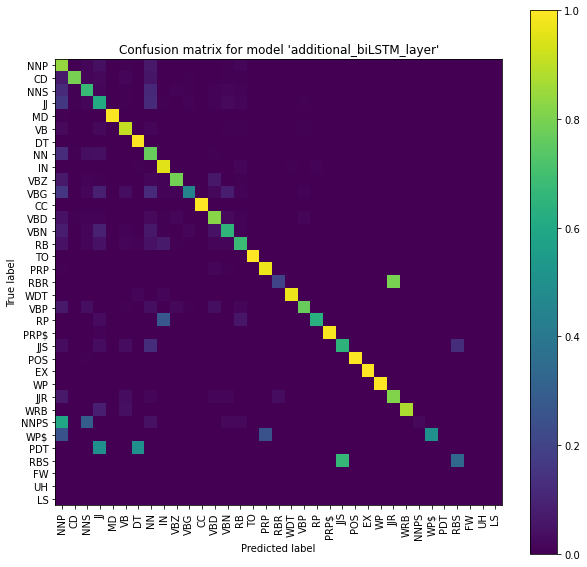

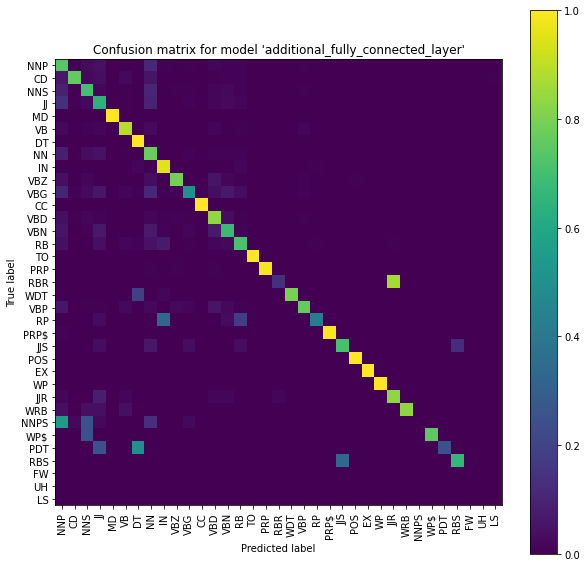

In [59]:
# create test dataloader
torch_test = PandasDataset(test)
test_dataloader = DataLoader(torch_test, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(x_.to(device) for x_ in pad_batch(x, emb_model)))
# compute report and conf matrix for the two best models
for model_dict in ranked_models[:2]:
  # compute predictions
  y_pred, y_true = get_ys(model_dict['best_trained_model'], test_dataloader,
                          PAD_INDEX, ignore_idx=ignore_idx)
  # also compute the classification report
  model_dict['classification_report'] = get_classification_report(y_pred, y_true)
  title = f"Confusion matrix for model '{model_dict['name']}'"
  plot_confusion_matrix(y_pred, y_true, normalize='true', title=title);

Print the classification reports for the two best models on the test set

In [60]:
for model_dict in ranked_models[:2]:
  print(model_dict['classification_report'])

              precision    recall  f1-score   support

         NNP       0.61      0.84      0.71      1504
          CD       0.96      0.80      0.87       858
         NNS       0.78      0.68      0.72       941
          JJ       0.67      0.61      0.64       918
          MD       0.96      0.99      0.98       167
          VB       0.84      0.91      0.87       403
          DT       0.98      0.99      0.99      1335
          NN       0.79      0.77      0.78      2383
          IN       0.96      0.96      0.96      1630
         VBZ       0.86      0.79      0.83       280
         VBG       0.74      0.45      0.56       221
          CC       0.99      1.00      0.99       366
         VBD       0.86      0.82      0.84       634
         VBN       0.68      0.65      0.67       366
          RB       0.71      0.68      0.70       381
          TO       1.00      1.00      1.00       386
         PRP       0.97      0.97      0.97       192
         RBR       0.50    

# Most Frequent Class Baseline results

## Building the baseline

In [61]:
# drop punctuation
train_frequency = train[["token_idx", "tag_idx"]].copy()
print(train_frequency.shape)
train_frequency = train_frequency[~train_frequency["tag_idx"].isin(ignore_idx)]
print(train_frequency.shape)

(47356, 2)
(41274, 2)


In [ ]:
most_freq_class_baseline = train_frequency.groupby(['token_idx'])['tag_idx'].agg(pd.Series.mode).to_frame(name = "most_frequent_tag_index").reset_index()
dict_freq = most_freq_class_baseline.set_index('token_idx')['most_frequent_tag_index'].to_dict()

In [63]:
test_frequency = test[["token_idx", "tag_idx"]].copy()
# drop punctuation
print(test_frequency.shape)
test_frequency = test_frequency[~test_frequency["tag_idx"].isin(ignore_idx)]
print(test_frequency.shape)

(15545, 2)
(13676, 2)


In [64]:
# find the most common tag of the trainset, to give it to the oov words
most_freq_tag = train["tag_idx"].mode()[0]  
print(most_freq_tag)

8


Function that maps each token to the most frequent tag associated with it

In [65]:
def map_frequencies(x):
  result = None
  try:
    result = dict_freq[x]
  except:
    # if not in the training set, assign the most frequent tag in general
    result = most_freq_tag
    return result
  try:
    result = int(result)
  except:
    # if mode returns more than 1 values
    result = int(result[0])
  return result

In [66]:
test_frequency["baseline_freq_pred"] = test_frequency["token_idx"].map(lambda x : map_frequencies(x))

## Compute test metrics for the Most Frequent Class Baseline

Add column counting correct predictions

In [68]:
test_frequency["are_equal"] = test_frequency.apply(lambda row: row["tag_idx"] == row["baseline_freq_pred"], axis=1)
print(test_frequency)

total_correct = test_frequency["are_equal"].value_counts().loc[True]

print(total_correct)

       token_idx  tag_idx  baseline_freq_pred  are_equal
78539     400549        0                   8      False
78540       7838        0                   8      False
78541        731        0                   0       True
78543        614        0                   0       True
78544       2963        0                   0       True
...          ...      ...                 ...        ...
94078         58        4                   4       True
94079        548        8                   8       True
94080          3        9                   9       True
94081        182        4                   4       True
94082         62        8                   8       True

[13676 rows x 4 columns]
11148


Compute the classification report and test set accuracy for the Most Frequent Class Baseline

In [69]:
report = get_classification_report(y_pred=test_frequency['baseline_freq_pred'], y_true=test_frequency['tag_idx'])
print(f'Classification report for the "most frequent class" baseline: \n {report}')
accuracy_baseline = total_correct / len(test_frequency)
print(f'Accuracy for the "most frequent class" baseline: {accuracy_baseline:.2f}')

Classification report for the "most frequent class" baseline: 
               precision    recall  f1-score   support

         NNP       0.85      0.52      0.64      1504
          CD       1.00      0.69      0.82       858
         NNS       0.92      0.79      0.85       941
          JJ       0.80      0.67      0.73       918
          MD       0.97      1.00      0.98       167
          VB       0.79      0.60      0.68       403
          DT       0.99      0.98      0.99      1335
          NN       0.56      0.92      0.70      2383
          IN       0.96      0.98      0.97      1630
         VBZ       0.94      0.85      0.89       280
         VBG       0.92      0.64      0.76       221
          CC       0.99      1.00      0.99       366
         VBD       0.87      0.82      0.84       634
         VBN       0.73      0.52      0.61       366
          RB       0.91      0.80      0.85       381
          TO       1.00      1.00      1.00       386
         PRP     

Visualize the confusion matrix for the Most Frequent Class Baseline on the test set

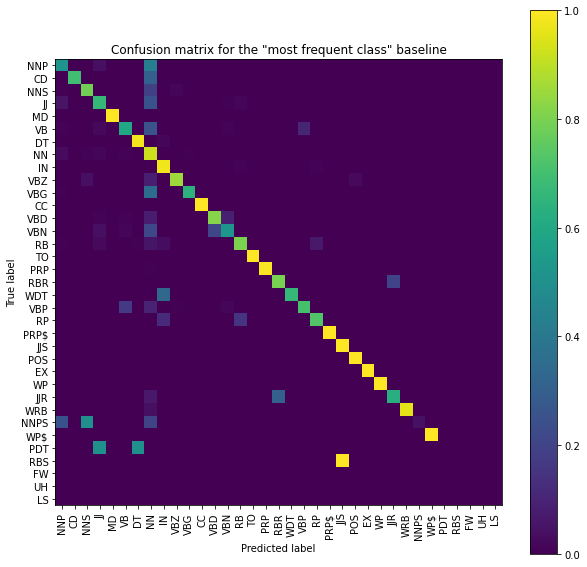

In [70]:
title = 'Confusion matrix for the "most frequent class" baseline'
plot_confusion_matrix(y_pred=test_frequency['baseline_freq_pred'], y_true=test_frequency['tag_idx'], title=title)